# `obs_prerank_enrich()` Enrichment: Gene List with Rank Scores for Observations

### Step 1: Prepare `rank_df`

Begin by preparing a list of genes along with their preranked scores (e.g., gene expression). Store this information in a DataFrame called `rank_df`.

- The **index** of `rank_df` should be the gene symbols.
- The **columns** of `rank_df` should correspond to one observation ID (e.g., sample or cell identifier).

This format allows `obs_prerank_enrich()` to perform enrichment analysis using observation-level ranked gene-level statistics.


In [1]:
%load_ext autoreload

import pandas as pd
rank_df = pd.read_csv("grea/data/GSE13268_expr.csv", index_col=0)
rank_df.head()

,GSM334850,GSM334851,GSM334852,GSM334853,GSM334854,GSM334855,GSM334856,GSM334857,GSM334858,GSM334859,...,GSM334941,GSM334942,GSM334943,GSM334944,GSM334945,GSM334946,GSM334947,GSM334948,GSM334949,GSM334950
symbol,,,,,,,,,,,,,,,,,,,,,
A1bg,3.571760,1.11627,11.55050,11.04560,2.742960,9.69463,7.40349,0.709628,7.526350,15.62100,...,7.59029,0.450372,0.911598,8.24978,0.567557,6.796200,6.382740,2.34760,0.68466,11.23300
A1cf,48.075200,23.09380,47.03710,36.40960,28.652900,26.35890,33.77320,33.610200,27.605900,15.56650,...,25.29960,20.527300,17.157700,31.47500,14.894300,22.987000,26.335800,24.31280,15.56490,29.42810
A2ml1,0.953989,2.70178,6.83848,2.23235,0.845507,1.59083,4.44694,2.506430,0.690331,1.04533,...,4.27877,7.875130,1.937090,3.39644,6.506060,0.845852,0.871744,3.71262,5.47173,1.30705
A3galt2,55.093700,53.86570,66.91050,55.12170,61.720200,56.92840,53.99490,54.910100,60.342300,37.47140,...,85.77660,74.817700,53.456900,79.28140,53.265400,71.644300,76.083200,80.58420,64.71110,79.28970
A4galt,18.853800,11.25860,4.73029,20.51850,11.892200,8.38279,17.57540,7.552850,13.629200,14.04210,...,2.98861,2.015280,11.015100,3.56110,14.187100,3.654270,11.556800,14.73220,2.16436,11.30980


### Step 2: Preparing Gene Set Libraries

There are several ways to prepare gene set libraries for use in GREA:

##### Option 1: Use Built-in Libraries
Simply specify the `libraries` you're interested in as a list. For example:

```python
libraries = ['KEGG_2019_Mouse', 'WikiPathways_2024_Mouse']
```

You can use the `grea.library.list_libraries()` function to view all available pathway libraries included in GREA.

##### Option 2: Load from GMT File
You can load external gene set libraries from `.gmt` files using:

```python
libraries = read_gmt('your_library_file.gmt')
```

##### Option 3: Define a Custom Library
Create your own gene set library using a Python dictionary, where each key is a pathway name and the corresponding value is a list of genes:

```python
libraries = {
    'term1': ['A2ml1', 'A1cf'],
    'term2': ['A3galt2', 'A4galt']
}
```

In [2]:
from grea.library import list_libraries

print(list_libraries())

['GeneSigDB', 'Enrichr_Submissions_TF-Gene_Coocurrence', 'SysMyo_Muscle_Gene_Sets', 'WikiPathway_2021_Human', 'HomoloGene', 'WikiPathways_2013', 'PFOCR_Pathways_2023', 'OMIM_Disease', 'Data_Acquisition_Method_Most_Popular_Genes', 'NIBR_Jensen_DISEASES_Curated_2025', 'Cancer_Cell_Line_Encyclopedia', 'WikiPathways_2016', 'WikiPathways_2015', 'RNAseq_Automatic_GEO_Signatures_Human_Up', 'Human_Gene_Atlas', 'KOMP2_Mouse_Phenotypes_2022', 'MoTrPAC_2023', 'Kinase_Perturbations_from_GEO_down', 'Disease_Signatures_from_GEO_down_2014', 'Disease_Perturbations_from_GEO_up', 'Old_CMAP_down', 'MCF7_Perturbations_from_GEO_up', 'NIH_Funded_PIs_2017_GeneRIF_ARCHS4_Predictions', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'PPI_Hub_Proteins', 'Disease_Signatures_from_GEO_up_2014', 'GTEx_Tissue_Expression_Up', 'NIBR_DRUGseq_2025_down', 'L1000_Kinase_and_GPCR_Perturbations_up', 'ARCHS4_Cell-lines', 'VirusMINT', 'KEGG_2019_Human', 'ARCHS4_Tissues', 'MGI_Mammalian_Phenotype_Level_4', 'The_Kinase_Librar

### Step 3: Run Enrichment

To perform enrichment analysis, call the `grea.obs_prerank_enrich(rank_df, libraries)` function. 
The observation-level enrichment do not estimate the p-value for efficiency.


The function returns a GREA object containing all enrichment results, including enrichment scores and statistical significance for each library term.


In [3]:
%autoreload

from grea import grea
libraries = ['WikiPathways_2024_Mouse']
obj = grea.obs_prerank_enrich(rank_df, libraries)
obj

---Finished: Load WikiPathways_2024_Mouse with 188 terms.


### Step 4: Check Enrichment Results

The `GREA` object stores all enrichment results, including enrichment scores and statistical significance for each library term. GREA supports three types of enrichment scores, each reflecting a different scoring strategy:

- `'KS-ES'`: Kolmogorov–Smirnov-based Enrichment Score, capturing the peak deviation between hit and miss distributions.
- `'KS-ESD'`: KS-based enrichment Score Difference, the sum of the maximum positive and negative deviations from the running score.
- `'RC-AUC'`: Area Under the Recovery Curve, summarizing early enrichment of target genes along the ranking.

You can select the appropriate metric depending on your analysis goal or data characteristics.

To retrieve the enrichment results as a long DataFrame, use the `get_enrich_results(metric)` function, as a wide DataFrame, use the `get_enrich_score(metric)`.


In [4]:
%autoreload

df = obj.get_enrich_results(metric='KS-ES')
df

,Term,Obs,KS-ES,N_lead_sigs,Lead_sigs
73,WikiPathways_2024_Mouse|Cytoplasmic Ribosomal ...,GSM334950,0.965889,27,Rpl26;Rps4x;Rps23;Rpl3;Rps24;Rps8;Rpl19;Rpl11;...
106,WikiPathways_2024_Mouse|Electron Transport Cha...,GSM334950,0.902016,35,Cox4i1;Uqcr10;Cox6a1;Cox7b;Uqcrfs1;Uqcrh;Ndufb...
91,WikiPathways_2024_Mouse|Oxidative Phosphorylat...,GSM334950,0.899714,20,Ndufb5;Ndufv2;Ndufc2;Ndufc1;Ndufa6;Ndufa2;Nduf...
115,WikiPathways_2024_Mouse|Fatty Acid Biosynthesi...,GSM334950,0.885870,10,Acsl1;Fasn;Decr1;Echdc1;Ech1;Acly;Acaa2;Hadh;A...
187,WikiPathways_2024_Mouse|TCA Cycle WP434,GSM334950,0.875674,17,Mdh1;Aco2;Cs;Sdhd;Sdhc;Dld;Sdha;Pdha1;Sdhb;Ogd...
...,...,...,...,...,...
95,WikiPathways_2024_Mouse|Dopaminergic Neurogene...,GSM334950,-0.588303,22,Nr4a2;Wnt1;Aldh1a1;Gbx2;Ret;Slc18a2;Gli1;Th;Dd...
50,WikiPathways_2024_Mouse|Cytokines And Inflamma...,GSM334950,-0.629334,20,Il1b;Cxcl1;Il7;Tnf;Il12b;Il3;Il1a;Il6;Csf3;Il1...
19,WikiPathways_2024_Mouse|GPCRs Class C Metabotr...,GSM334950,-0.660126,12,Grm8;Gprc5a;Gprc5c;Grm1;Gabbr2;Grm2;Grm6;Casr;...
100,WikiPathways_2024_Mouse|Fatty Acid Omega Oxida...,GSM334950,-0.665126,5,Aldh1a1;Cyp2e1;Adh7;Cyp1a2;Cyp1a1


In [5]:
%autoreload

df = obj.get_enrich_score(metric='KS-ES')
df

,GSM334850,GSM334851,GSM334852,GSM334853,GSM334854,GSM334855,GSM334856,GSM334857,GSM334858,GSM334859,...,GSM334941,GSM334942,GSM334943,GSM334944,GSM334945,GSM334946,GSM334947,GSM334948,GSM334949,GSM334950
WikiPathways_2024_Mouse|Transcriptional Activation By Nfe2l2 Response To Phytochemicals WP1245,0.412830,0.467998,0.436660,0.458399,0.462322,0.395814,0.440631,0.427856,0.504467,0.426130,...,0.570103,0.609538,0.614854,0.580669,0.555469,0.566584,0.621786,0.580979,0.618088,0.533673
WikiPathways_2024_Mouse|Cholesterol Metabolism W Bloch And Kandutsch Russell Pathways WP4346,0.670548,0.649544,0.673325,0.726577,0.634954,0.605772,0.648493,0.634346,0.602966,0.593843,...,0.647829,0.681657,0.662473,0.656324,0.633617,0.630928,0.664833,0.605766,0.635952,0.635421
WikiPathways_2024_Mouse|Ethanol Metabolism Resulting In Production Of ROS By CYP2E1 WP4265,0.341948,0.198178,0.243526,0.279609,0.277841,0.264209,0.385532,0.268891,0.249796,0.197347,...,0.301717,0.291126,0.305152,0.318816,0.258572,0.312139,0.347613,0.295290,0.338123,0.302688
WikiPathways_2024_Mouse|Dysregulated miRNA Targeting In Insulin PI3K AKT Signaling WP3855,0.864432,0.866824,0.876477,0.892865,0.859135,0.855858,0.870907,0.871072,0.881901,0.881987,...,0.855171,0.847003,0.816605,0.816138,0.811848,0.804385,0.795185,0.831287,0.814979,0.836070
WikiPathways_2024_Mouse|Eicosanoid Metabolism Via Cytochrome P450 Monooxygenases WP4349,-0.570016,-0.661496,-0.527145,-0.560909,-0.653584,-0.745868,-0.611986,-0.754485,-0.713905,-0.741716,...,-0.544996,-0.452423,-0.617188,-0.548674,-0.734372,-0.768024,-0.778717,-0.776660,-0.872260,-0.873169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WikiPathways_2024_Mouse|Methylation WP1247,0.391970,0.324458,0.328212,0.332118,0.386053,0.362876,0.418902,0.326840,0.327292,0.406575,...,0.457257,0.519223,0.515295,0.512668,0.480336,0.496474,0.489760,0.477241,0.454640,0.518497
WikiPathways_2024_Mouse|Mapk Cascade WP251,0.568139,0.580301,0.609159,0.565462,0.556724,0.495847,0.499219,0.519504,0.571507,0.558285,...,0.412599,0.418264,0.450851,0.409032,0.457314,0.486550,0.478074,0.396986,0.455132,0.491183
WikiPathways_2024_Mouse|Apoptosis WP1254,0.294739,0.281215,0.322398,0.326298,0.289497,0.358050,0.369617,0.327916,0.311259,0.281115,...,0.384741,0.377897,0.384152,0.336996,0.380882,0.374894,0.357647,0.362886,0.410473,0.349025
WikiPathways_2024_Mouse|GPCRs Other WP41,-0.512467,-0.480542,-0.472730,-0.454921,-0.475378,-0.470748,-0.440662,-0.442404,-0.511002,-0.507203,...,-0.451471,-0.457074,-0.479113,-0.458720,-0.463978,-0.445054,-0.477035,-0.448287,-0.459994,-0.437742


In [6]:
%autoreload

df = obj.get_enrich_results(metric='KS-ESD')
df

,Term,Obs,KS-ESD,N_lead_sigs,Lead_sigs
73,WikiPathways_2024_Mouse|Cytoplasmic Ribosomal ...,GSM334950,0.964083,27,Rpl26;Rps4x;Rps23;Rpl3;Rps24;Rps8;Rpl19;Rpl11;...
106,WikiPathways_2024_Mouse|Electron Transport Cha...,GSM334950,0.899107,35,Cox4i1;Uqcr10;Cox6a1;Cox7b;Uqcrfs1;Uqcrh;Ndufb...
115,WikiPathways_2024_Mouse|Fatty Acid Biosynthesi...,GSM334950,0.884537,10,Acsl1;Fasn;Decr1;Echdc1;Ech1;Acly;Acaa2;Hadh;A...
91,WikiPathways_2024_Mouse|Oxidative Phosphorylat...,GSM334950,0.870286,20,Ndufb5;Ndufv2;Ndufc2;Ndufc1;Ndufa6;Ndufa2;Nduf...
187,WikiPathways_2024_Mouse|TCA Cycle WP434,GSM334950,0.869473,17,Mdh1;Aco2;Cs;Sdhd;Sdhc;Dld;Sdha;Pdha1;Sdhb;Ogd...
...,...,...,...,...,...
95,WikiPathways_2024_Mouse|Dopaminergic Neurogene...,GSM334950,-0.586733,22,Nr4a2;Wnt1;Aldh1a1;Gbx2;Ret;Slc18a2;Gli1;Th;Dd...
50,WikiPathways_2024_Mouse|Cytokines And Inflamma...,GSM334950,-0.604381,20,Il1b;Cxcl1;Il7;Tnf;Il12b;Il3;Il1a;Il6;Csf3;Il1...
100,WikiPathways_2024_Mouse|Fatty Acid Omega Oxida...,GSM334950,-0.645538,5,Aldh1a1;Cyp2e1;Adh7;Cyp1a2;Cyp1a1
19,WikiPathways_2024_Mouse|GPCRs Class C Metabotr...,GSM334950,-0.648966,12,Grm8;Gprc5a;Gprc5c;Grm1;Gabbr2;Grm2;Grm6;Casr;...


In [7]:
%autoreload

df = obj.get_enrich_score(metric='KS-ESD')
df

,GSM334850,GSM334851,GSM334852,GSM334853,GSM334854,GSM334855,GSM334856,GSM334857,GSM334858,GSM334859,...,GSM334941,GSM334942,GSM334943,GSM334944,GSM334945,GSM334946,GSM334947,GSM334948,GSM334949,GSM334950
WikiPathways_2024_Mouse|Transcriptional Activation By Nfe2l2 Response To Phytochemicals WP1245,0.324636,0.414611,0.372847,0.406815,0.405251,0.322672,0.390537,0.362867,0.451002,0.353223,...,0.529965,0.569557,0.575735,0.538415,0.512901,0.528249,0.576160,0.538019,0.575442,0.485774
WikiPathways_2024_Mouse|Cholesterol Metabolism W Bloch And Kandutsch Russell Pathways WP4346,0.669448,0.645677,0.668263,0.726420,0.634168,0.591900,0.647550,0.632460,0.600765,0.591249,...,0.646493,0.680242,0.660744,0.654909,0.632123,0.629592,0.662554,0.595761,0.634616,0.634085
WikiPathways_2024_Mouse|Ethanol Metabolism Resulting In Production Of ROS By CYP2E1 WP4265,0.210511,0.061569,0.112168,0.147624,0.159964,0.135571,0.250255,0.145292,0.151434,0.070064,...,0.200377,0.198721,0.199109,0.205641,0.145710,0.209388,0.259440,0.183291,0.234980,0.188338
WikiPathways_2024_Mouse|Dysregulated miRNA Targeting In Insulin PI3K AKT Signaling WP3855,0.864118,0.866510,0.876320,0.892786,0.859135,0.855623,0.870907,0.870836,0.881822,0.881830,...,0.854543,0.845983,0.813702,0.814177,0.810906,0.803601,0.794086,0.830895,0.814273,0.835835
WikiPathways_2024_Mouse|Eicosanoid Metabolism Via Cytochrome P450 Monooxygenases WP4349,-0.413965,-0.536467,-0.467293,-0.334978,-0.569683,-0.616295,-0.552683,-0.550725,-0.584881,-0.662515,...,-0.288425,-0.270299,-0.548752,-0.463362,-0.713142,-0.702063,-0.740096,-0.719864,-0.798073,-0.824991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WikiPathways_2024_Mouse|Methylation WP1247,0.228440,0.101532,0.168696,0.188356,0.260204,0.182830,0.258322,0.116430,0.060950,0.203101,...,0.310465,0.446882,0.443503,0.439230,0.349936,0.412625,0.432075,0.283084,0.379164,0.331828
WikiPathways_2024_Mouse|Mapk Cascade WP251,0.514322,0.548058,0.586095,0.553223,0.503849,0.412848,0.454424,0.444349,0.497450,0.487052,...,0.317047,0.359270,0.391386,0.313480,0.386239,0.410768,0.436182,0.287392,0.376996,0.414930
WikiPathways_2024_Mouse|Apoptosis WP1254,0.281438,0.264137,0.313111,0.319529,0.277613,0.346480,0.360881,0.317291,0.284893,0.257347,...,0.381986,0.374434,0.380296,0.332746,0.367423,0.373163,0.352531,0.359974,0.408663,0.346821
WikiPathways_2024_Mouse|GPCRs Other WP41,-0.500362,-0.469012,-0.444671,-0.399914,-0.462654,-0.443355,-0.376171,-0.418668,-0.500155,-0.493605,...,-0.431743,-0.436391,-0.428427,-0.431691,-0.437685,-0.412836,-0.426068,-0.437598,-0.420218,-0.422887


In [8]:
%autoreload

df = obj.get_enrich_results(metric='RC-AUC')
df

,Term,Obs,RC-AUC
73,WikiPathways_2024_Mouse|Cytoplasmic Ribosomal ...,GSM334950,0.980791
187,WikiPathways_2024_Mouse|TCA Cycle WP434,GSM334950,0.961711
130,WikiPathways_2024_Mouse|Leptin And Adiponectin...,GSM334950,0.958069
9,WikiPathways_2024_Mouse|Mitochondrial Long Cha...,GSM334950,0.957908
106,WikiPathways_2024_Mouse|Electron Transport Cha...,GSM334950,0.956826
...,...,...,...
95,WikiPathways_2024_Mouse|Dopaminergic Neurogene...,GSM334950,0.184888
127,WikiPathways_2024_Mouse|Blood Clotting Cascade...,GSM334950,0.177518
50,WikiPathways_2024_Mouse|Cytokines And Inflamma...,GSM334950,0.173345
100,WikiPathways_2024_Mouse|Fatty Acid Omega Oxida...,GSM334950,0.156878


In [9]:
%autoreload

df = obj.get_enrich_score(metric='RC-AUC')
df

,GSM334850,GSM334851,GSM334852,GSM334853,GSM334854,GSM334855,GSM334856,GSM334857,GSM334858,GSM334859,...,GSM334941,GSM334942,GSM334943,GSM334944,GSM334945,GSM334946,GSM334947,GSM334948,GSM334949,GSM334950
WikiPathways_2024_Mouse|Transcriptional Activation By Nfe2l2 Response To Phytochemicals WP1245,0.732146,0.771565,0.749182,0.769340,0.769474,0.739092,0.762855,0.743279,0.777384,0.735382,...,0.826005,0.840247,0.828333,0.821854,0.823667,0.827934,0.831418,0.829347,0.827472,0.802082
WikiPathways_2024_Mouse|Cholesterol Metabolism W Bloch And Kandutsch Russell Pathways WP4346,0.855176,0.843794,0.852178,0.887795,0.836958,0.810580,0.848939,0.821041,0.806318,0.800028,...,0.826801,0.861512,0.846971,0.847585,0.816736,0.811078,0.843680,0.819713,0.833843,0.847994
WikiPathways_2024_Mouse|Ethanol Metabolism Resulting In Production Of ROS By CYP2E1 WP4265,0.636969,0.541199,0.571568,0.586619,0.578635,0.564332,0.647095,0.585797,0.594306,0.564409,...,0.622647,0.631365,0.602077,0.657599,0.616905,0.661015,0.641939,0.628812,0.639254,0.649207
WikiPathways_2024_Mouse|Dysregulated miRNA Targeting In Insulin PI3K AKT Signaling WP3855,0.960312,0.963226,0.965457,0.971761,0.958925,0.959641,0.961523,0.960095,0.961678,0.959279,...,0.952352,0.950824,0.932386,0.936580,0.944187,0.942765,0.933665,0.953321,0.946336,0.951073
WikiPathways_2024_Mouse|Eicosanoid Metabolism Via Cytochrome P450 Monooxygenases WP4349,0.283024,0.233001,0.234691,0.287716,0.214288,0.178752,0.213868,0.221139,0.225308,0.145723,...,0.378442,0.400005,0.275819,0.281291,0.163795,0.168771,0.141251,0.141638,0.104123,0.099849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WikiPathways_2024_Mouse|Methylation WP1247,0.613307,0.523949,0.554634,0.577453,0.590747,0.569955,0.613894,0.561042,0.522530,0.554714,...,0.602483,0.696914,0.702088,0.697341,0.619474,0.643634,0.696289,0.619638,0.644841,0.640961
WikiPathways_2024_Mouse|Mapk Cascade WP251,0.791984,0.817802,0.823832,0.819021,0.791384,0.755890,0.758411,0.772345,0.798788,0.793594,...,0.706039,0.743088,0.760654,0.727989,0.734325,0.738865,0.789105,0.702384,0.751718,0.737572
WikiPathways_2024_Mouse|Apoptosis WP1254,0.643111,0.634798,0.653017,0.670450,0.641256,0.677148,0.714072,0.663633,0.634499,0.639560,...,0.702779,0.702011,0.733636,0.700809,0.709866,0.709056,0.696115,0.704050,0.746741,0.695928
WikiPathways_2024_Mouse|GPCRs Other WP41,0.231873,0.248629,0.260324,0.277640,0.249948,0.255615,0.259864,0.262662,0.227867,0.225685,...,0.261175,0.246746,0.257496,0.250731,0.262596,0.269203,0.266664,0.246656,0.265505,0.264471


### Step 5: Visualize Enrichment Results

To visualize the enrichment results, use the `pl_running_sum(metric, term, obs_id)` function by specifying the desired metric, term, and observation ID.


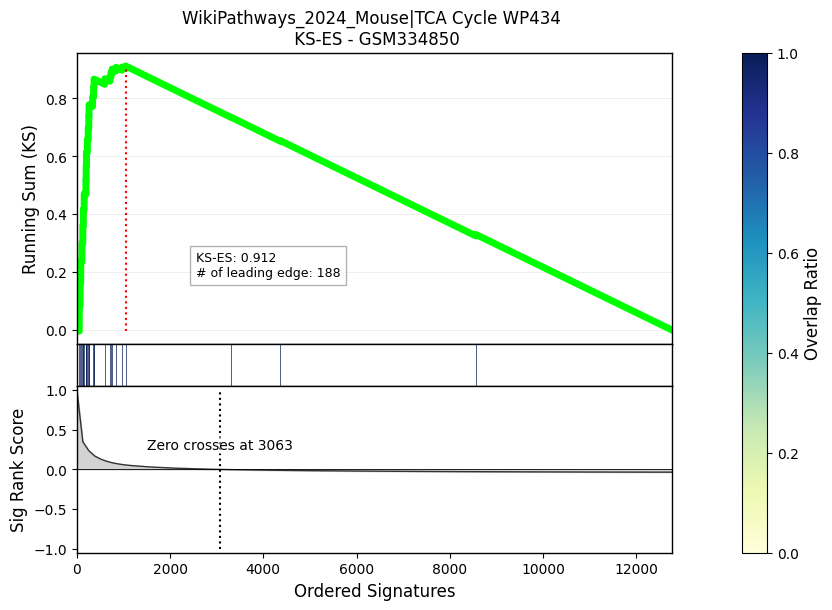

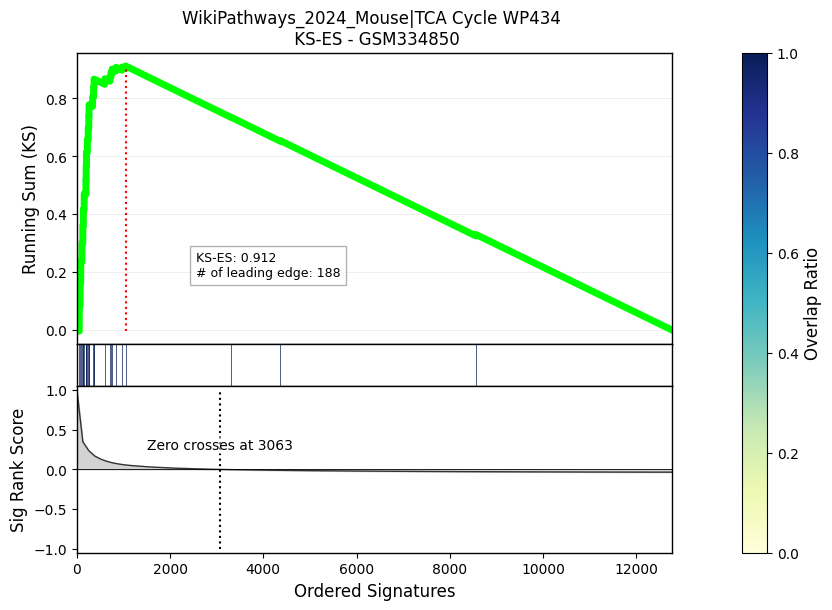

In [10]:
%autoreload
term = 'WikiPathways_2024_Mouse|TCA Cycle WP434'
obs_id = 'GSM334850'
fig = obj.pl_running_sum('KS-ES', term, obs_id)
fig

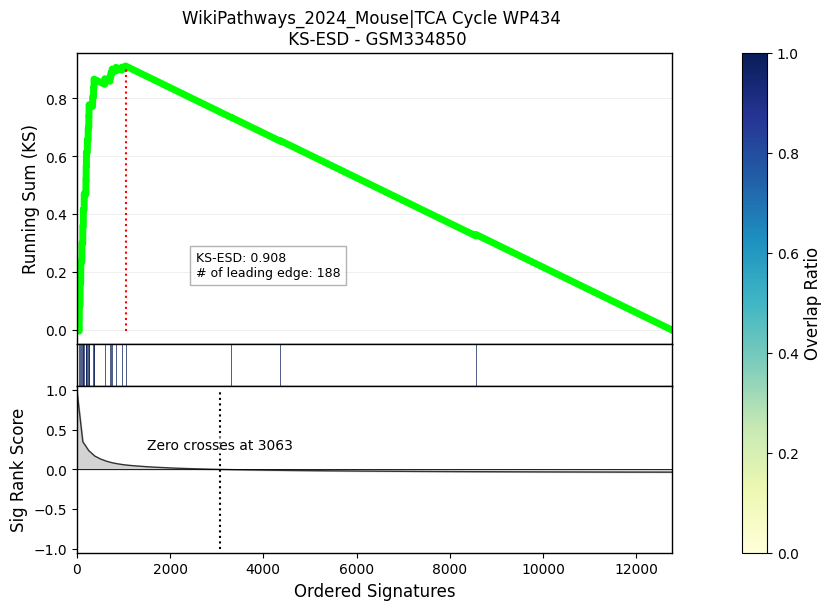

In [11]:
%autoreload
term = 'WikiPathways_2024_Mouse|TCA Cycle WP434'
obs_id = 'GSM334850'
fig = obj.pl_running_sum('KS-ESD', term, obs_id)
fig

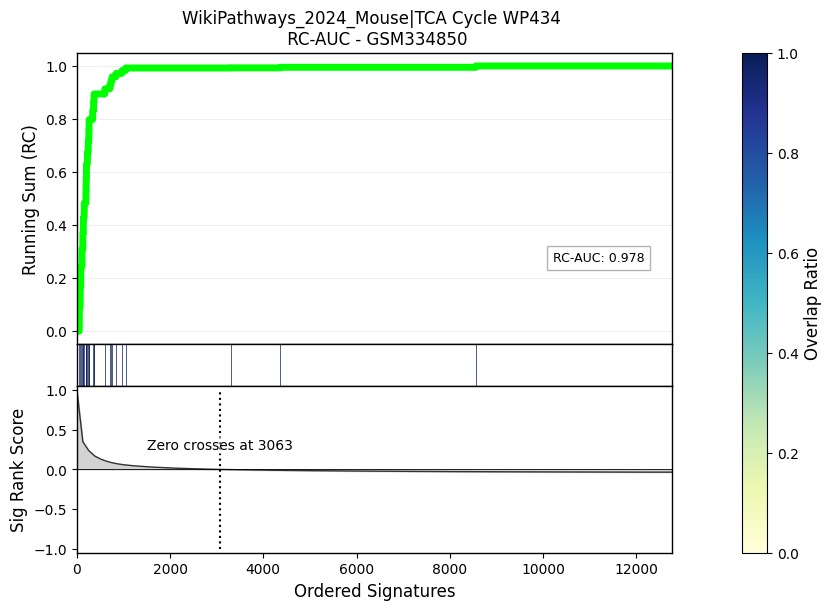

In [12]:
%autoreload
term = 'WikiPathways_2024_Mouse|TCA Cycle WP434'
obs_id = 'GSM334850'
fig = obj.pl_running_sum('RC-AUC', term, obs_id)
fig